# IDS2021 project D17, Kaggle - Trump tweets
# Do you tweet like Donald Trump?
## Team: Anna-Mai Allikmäe, Iris Luik, Susanna Mett, Kevin Telliskivi
Our dataset is from Kaggle: https://www.kaggle.com/austinreese/trump-tweets?select=trumptweets.csv 

#### Content:

* Importing data
* Getting to know the data
* Data cleaning
* Exploring tweets
* Topic modelling
* Sentiment analysis
* Model for predicting the popularity of the tweets
* Pre-election, election time
* Sentiment in different time periods

# Importing data

In [1]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(5000)

3000


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
with open('trumptweets.csv', 'r') as f:
    andmed = pd.read_csv(f)

In [4]:
andmed

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


# Getting to know the data

In [5]:
andmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         41122 non-null  int64  
 1   link       41122 non-null  object 
 2   content    41122 non-null  object 
 3   date       41122 non-null  object 
 4   retweets   41122 non-null  int64  
 5   favorites  41122 non-null  int64  
 6   mentions   22467 non-null  object 
 7   hashtags   5810 non-null   object 
 8   geo        0 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


In [6]:
andmed.describe()

,id,retweets,favorites,geo
count,4.112200e+04,41122.000000,41122.000000,0.0
mean,6.088909e+17,5455.590657,22356.899105,NaN
std,3.027946e+17,10130.076661,41501.859711,NaN
min,1.698309e+09,0.000000,0.000000,NaN
25%,3.549428e+17,25.000000,28.000000,NaN
50%,5.609149e+17,291.000000,247.000000,NaN
75%,7.941218e+17,8778.000000,32970.750000,NaN
max,1.219077e+18,309892.000000,857678.000000,NaN


In [7]:
andmed.describe(include=object)

,link,content,date,mentions,hashtags
count,41122,41122,41122,22467,5810
unique,41122,40909,40812,2795,141
top,https://twitter.com/realDonaldTrump/status/122...,MAKE AMERICA GREAT AGAIN!,2019-09-09 05:11:53,@,#
freq,1,33,4,8827,4152


# Data cleaning

Removing special characters, stopwords etc. and lemmatizing.

In [8]:
# Cleaning

stop_words = set(stopwords.words('english')) #stop words
lemmatizer = WordNetLemmatizer()

def puhastus(tekst):
    tekst = tekst.lower() #lowercase only
    tekst = re.sub('[^ ]*\.com[^ ]*|[^ ]*bit\.ly[^ ]*| *@[^ ]* ', '', tekst) #removing hyperlinks and @
    tekst = re.sub('[+]|[^a-zA-Z| ]', '', tekst) #removing punctuation marks
    
    #Tokenizing
    tekst = word_tokenize(tekst)
    
    #Lemmatization and removing stopwords
    valjund = []
    for sona in tekst:
        lemma = lemmatizer.lemmatize(sona)
        if lemma not in stop_words:
            valjund.append(lemma)
    
    return valjund

#Copy + removing undeeded columns (id, link, mentions, hashtags and geo) + adding column "lemmas"
tweets = andmed.copy().drop(columns = ['id', 'link', 'mentions', 'hashtags', 'geo'])
tweets['lemmas'] = '' #New columns for tokenized wordlists
tweets['lemmas'] = tweets['lemmas'].astype('object')

#Cleaned wordlists into "lemmas"
for i in range(len(tweets)):
    puhas = puhastus(tweets.content[i])
    tweets.at[i, 'lemmas'] = puhas

#Removes empty tweets (tweets containing only picture or hyperlink for example)
tweets.drop(tweets[tweets['lemmas'].map(len) == 0].index, inplace = True)
tweets.drop(tweets[tweets['lemmas'].map(len) == 1].index, inplace = True)

In [9]:
tweet_texts = [] 

for el in tweets.lemmas: #lemmatized tweets into new list
    tweet_texts.append(el)

In [215]:
#List of tweet content
tweets_to_vec = []
tweets_id = []

for i, el in enumerate(tweets.lemmas):
    text = ' '.join(el)
    tweets_to_vec.append(text)
    tweets_id.append(i)

In [11]:
tweets_to_vec

['sure tune watch donald trump late night david letterman present top ten list tonight',
 'donald trump appearing view tomorrow morning discus celebrity apprentice new book think like champion',
 'donald trump read top ten financial tip late show david letterman funny',
 'new blog post celebrity apprentice finale lesson learned along way',
 'persona never wallflower id rather build wall cling donald j trump',
 'miss usa tara conner fired ive always believer second chance say donald trump',
 'listen interview donald trump discussing new book think like champion',
 'strive wholeness keep sense wonder intact donald j trump',
 'enter think like champion signed book keychain contest',
 'achiever achieves plateau beginning donald j trump',
 'dont afraid unique like afraid best self donald j trump',
 'win life champion view moment donald j trump',
 'dayswe could use little power trumpative thinking',
 'always know could precipice something great donald j trump',
 'read great interview donald 

# Exploring tweets (most common words etc)

In [12]:
from wordcloud import WordCloud

In [13]:
sumlist = []
for i in range (len(tweet_texts)):
    for n in range (len(tweet_texts[i])):
        sumlist.append(tweet_texts[i][n])

In [14]:
for el in sumlist:
    if el == "wa" or el == "ha" or el =="u":
        sumlist.remove(el)

#Removing "wa","ha" and "u" because those are stop words 

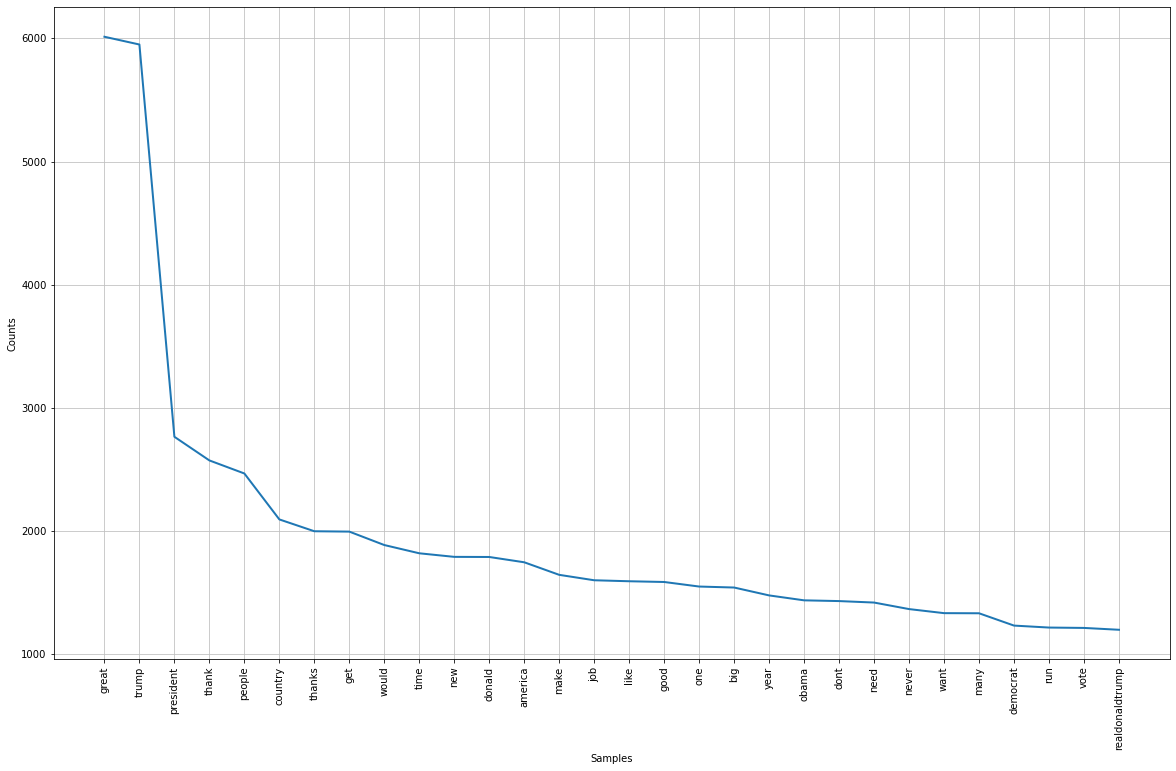

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
words_frequency = nltk.FreqDist(sumlist)

plt.subplots(figsize=(20,12))
words_frequency.plot(30)

Words "great" and "trump" are by far the most used words with around 6000 instances of use. Words used over 2000 times are "president", "thank", "people", "country", "thanks", and "get".

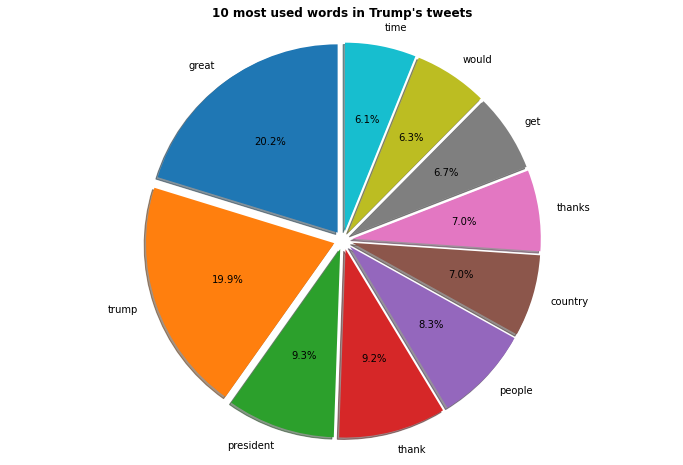

In [16]:
best10_=6041 +5951+2766+2746+2467+2094+2075+ 1995+1886+1820
sizes = [6041/best10_*100, 5951/best10_*100, 2766/best10_*100, 2746/best10_*100, 2467/best10_*100, 2094/best10_*100, 2075/best10_*100,1995/best10_*100, 1886/best10_*100, 1820/best10_*100]
labels = "great", "trump", "president", "thank", "people", "country", "thanks", "get", "would", "time"
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1) #explode all slices

plt.subplots(figsize=(12,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=2)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("10 most used words in Trump's tweets", fontweight="bold")
plt.show()

In [17]:
mostcommon = words_frequency.most_common(50)
mostcommon

[('great', 6013),
 ('trump', 5950),
 ('president', 2765),
 ('thank', 2573),
 ('people', 2467),
 ('country', 2094),
 ('thanks', 1998),
 ('get', 1995),
 ('would', 1886),
 ('time', 1819),
 ('new', 1790),
 ('donald', 1789),
 ('america', 1746),
 ('make', 1644),
 ('job', 1600),
 ('like', 1592),
 ('good', 1586),
 ('one', 1549),
 ('big', 1541),
 ('year', 1477),
 ('obama', 1437),
 ('dont', 1431),
 ('need', 1419),
 ('never', 1366),
 ('want', 1333),
 ('many', 1332),
 ('democrat', 1232),
 ('run', 1216),
 ('vote', 1213),
 ('realdonaldtrump', 1198),
 ('today', 1168),
 ('love', 1163),
 ('going', 1160),
 ('state', 1157),
 ('much', 1148),
 ('back', 1126),
 ('american', 1117),
 ('best', 1069),
 ('news', 1064),
 ('know', 1056),
 ('think', 1027),
 ('go', 986),
 ('deal', 979),
 ('see', 976),
 ('republican', 970),
 ('show', 966),
 ('must', 946),
 ('border', 939),
 ('day', 933),
 ('really', 919)]

In [18]:
joined=' '.join([i for i in sumlist if not i.isdigit()])

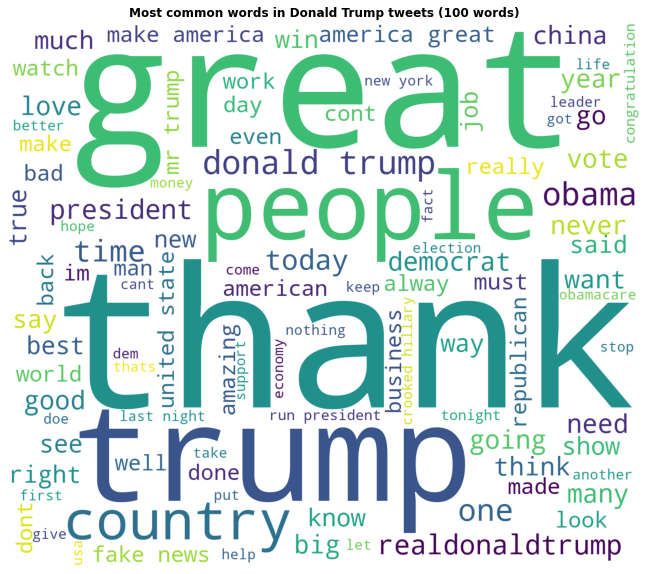

In [19]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(joined)
plt.imshow(wordcloud)
plt.title('Most common words in Donald Trump tweets (100 words)', fontweight="bold")
plt.axis('off')
plt.show()

### Before presidential time
Trump was inaugurated as the 45th president of the United States on January 20, 2017. Tweets posted before that are considered as tweets before his presidential time. 

In [20]:
andmed['date'] = pd.to_datetime(andmed['date'])

In [21]:
split_date ='2017-01-20 00:00:00'
pre_presidential = tweets.loc[tweets['date'] < split_date]
during_presidential = tweets.loc[tweets['date'] >= split_date]

In [22]:
#make list of tweets before presidential time
tweets_before = []

for el in pre_presidential.lemmas:
    tweets_before.append(el)

In [23]:
presumlist = []
for i in range (len(tweets_before)):
    for n in range (len(tweets_before[i])):
        presumlist.append(tweets_before[i][n])

In [24]:
for el in presumlist:
    if el == "wa" or el == "ha" or el =="u":
        presumlist.remove(el)

#Removing "wa","ha" and "u" because those are stop words 

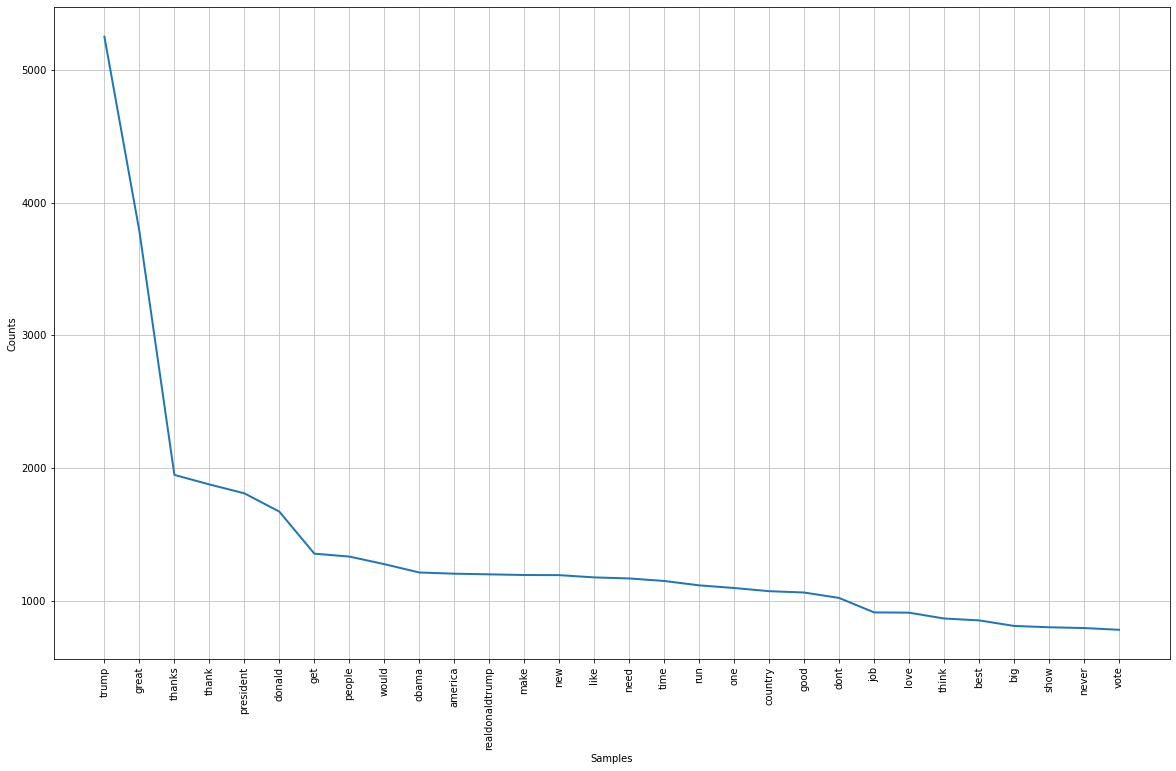

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
pre_words_frequency = nltk.FreqDist(presumlist)

plt.subplots(figsize=(20,12))
pre_words_frequency.plot(30)


Word "trump" is by far the most used with over 5000 instances, after which comes "great" with about 3800 uses.

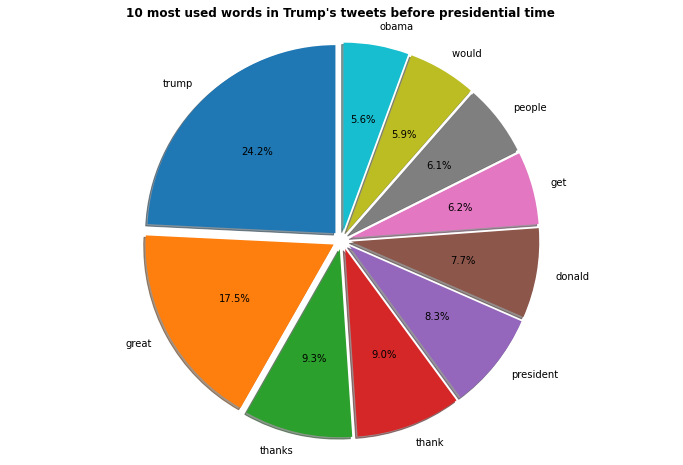

In [26]:
best10 = 5253 + 3800 + 2017 + 1958 + 1810 + 1671 + 1354 + 1332 + 1275 + 1212
sizes = [5253/best10*100, 3800/best10*100, 2017/best10*100, 1958/best10*100, 1810/best10*100, 1671/best10*100, 1354/best10*100, 1332/best10*100, 1275/best10*100, 1212/best10*100]  
labels = "trump", "great", "thanks", "thank", "president", "donald","get", "people", "would ", "obama"
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.subplots(figsize=(12,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=2)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("10 most used words in Trump's tweets before presidential time ", fontweight="bold")
plt.show()

In [27]:
pre_mostcommon = pre_words_frequency.most_common(50)
pre_mostcommon

[('trump', 5252),
 ('great', 3784),
 ('thanks', 1948),
 ('thank', 1876),
 ('president', 1809),
 ('donald', 1671),
 ('get', 1354),
 ('people', 1332),
 ('would', 1275),
 ('obama', 1212),
 ('america', 1203),
 ('realdonaldtrump', 1198),
 ('make', 1193),
 ('new', 1192),
 ('like', 1175),
 ('need', 1167),
 ('time', 1148),
 ('run', 1115),
 ('one', 1095),
 ('country', 1071),
 ('good', 1061),
 ('dont', 1020),
 ('job', 911),
 ('love', 909),
 ('think', 865),
 ('best', 851),
 ('big', 809),
 ('show', 799),
 ('never', 793),
 ('vote', 780),
 ('going', 755),
 ('know', 738),
 ('want', 732),
 ('back', 715),
 ('year', 711),
 ('true', 695),
 ('cant', 685),
 ('see', 682),
 ('go', 679),
 ('today', 662),
 ('really', 659),
 ('many', 651),
 ('hillary', 644),
 ('last', 615),
 ('im', 615),
 ('much', 609),
 ('tonight', 605),
 ('mr', 587),
 ('work', 580),
 ('interview', 576)]

In [28]:
pre_joined=' '.join([i for i in presumlist if not i.isdigit()])

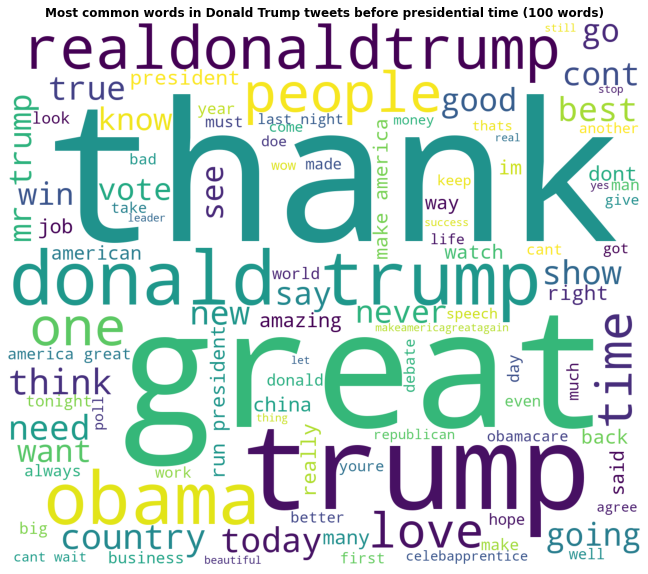

In [29]:
plt.subplots(figsize=(16,10))
prewordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(pre_joined)
plt.imshow(prewordcloud)
plt.title('Most common words in Donald Trump tweets before presidential time (100 words)', fontweight="bold")
plt.axis('off')
plt.show()

### During presidential time
Trump came into the office on 20th of January in 2017. 

In [30]:
#make list of tweets during presidential time
tweets_during = []

for el in during_presidential.lemmas:
    tweets_during.append(el)
    
tweets_during

[['thank',
  'joining',
  'u',
  'lincoln',
  'memorial',
  'tonight',
  'special',
  'evening',
  'together',
  'going',
  'make',
  'america',
  'great'],
 ['thank', 'wonderful', 'evening', 'washington', 'dc'],
 ['begin',
  'today',
  'see',
  'swearingin',
  'movement',
  'continues',
  'work',
  'begin'],
 ['today',
  'merely',
  'transferring',
  'power',
  'one',
  'administration',
  'another',
  'one',
  'party',
  'another',
  'transferring'],
 ['power',
  'washington',
  'dc',
  'giving',
  'back',
  'american',
  'people',
  'inaugurationday'],
 ['truly',
  'matter',
  'party',
  'control',
  'government',
  'whether',
  'government',
  'controlled',
  'people'],
 ['january', 'th', 'remembered', 'day', 'people', 'became', 'ruler', 'nation'],
 ['forgotten',
  'men',
  'woman',
  'country',
  'forgotten',
  'longer',
  'moment',
  'going',
  'americafirst'],
 ['bring',
  'back',
  'job',
  'bring',
  'back',
  'border',
  'bring',
  'back',
  'wealth',
  'bring',
  'back',
  '

In [31]:
duringsumlist = []
for i in range (len(tweets_during)):
    for n in range (len(tweets_during[i])):
        duringsumlist.append(tweets_during[i][n])

In [32]:
for el in duringsumlist:
    if el == "wa" or el == "ha" or el =="u":
        duringsumlist.remove(el)

#Removing "wa","ha" and "u" because those are stop words 

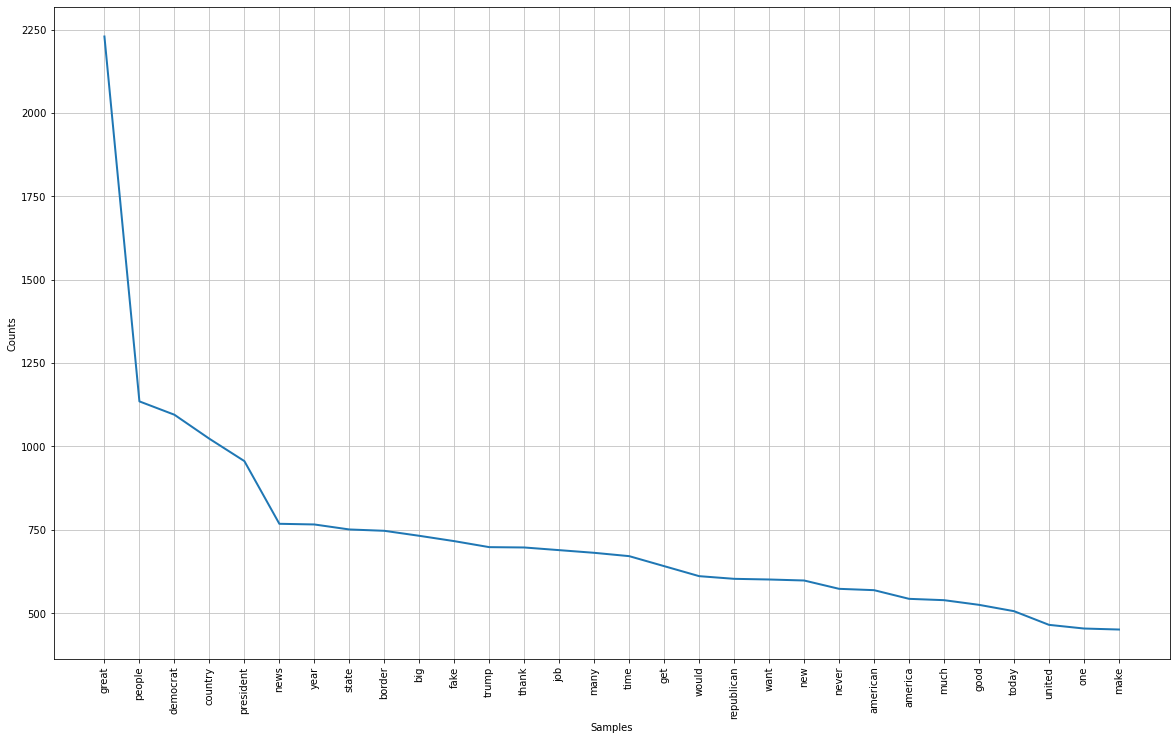

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
during_words_frequency = nltk.FreqDist(duringsumlist)

plt.subplots(figsize=(20,12))
during_words_frequency.plot(30)

Word "great" is the most used, after which come "people", "democrat", "country", and "president".

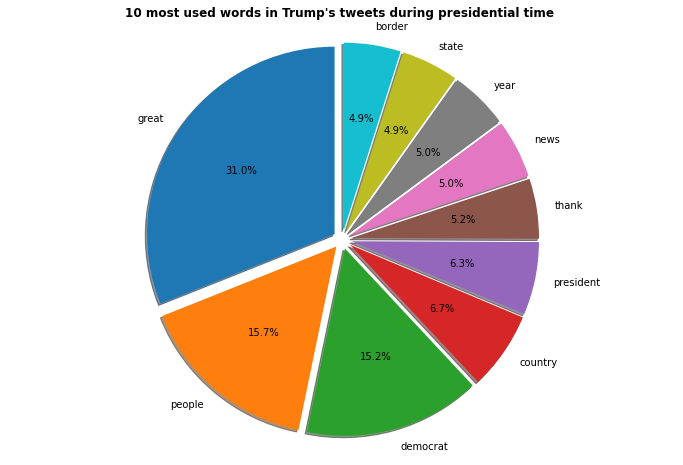

In [34]:
best_10 = 2241 + 1135 + 1096 + 1023 + 956 + 788 + 768 + 766 + 751 + 747

sizes = [2241/best_10*100, 1135/best_10*100, 1096/best_10*100, 1023/best10*100, 956/best10*100, 788/best10*100, 768/best10*100, 766/best10*100, 751/best10*100, 747/best10*100]  
labels = "great", "people", "democrat","country", "president", "thank", "news", "year", "state", "border"
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.subplots(figsize=(12,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=2)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("10 most used words in Trump's tweets during presidential time ", fontweight="bold")
plt.show()

In [35]:
during_mostcommon = during_words_frequency.most_common(50)
during_mostcommon

[('great', 2229),
 ('people', 1135),
 ('democrat', 1095),
 ('country', 1023),
 ('president', 956),
 ('news', 768),
 ('year', 766),
 ('state', 751),
 ('border', 747),
 ('big', 732),
 ('fake', 716),
 ('trump', 698),
 ('thank', 697),
 ('job', 689),
 ('many', 681),
 ('time', 671),
 ('get', 641),
 ('would', 611),
 ('republican', 603),
 ('want', 601),
 ('new', 598),
 ('never', 573),
 ('american', 569),
 ('america', 543),
 ('much', 539),
 ('good', 525),
 ('today', 506),
 ('united', 465),
 ('one', 454),
 ('make', 451),
 ('medium', 451),
 ('even', 447),
 ('vote', 433),
 ('done', 426),
 ('must', 425),
 ('like', 417),
 ('china', 413),
 ('back', 411),
 ('dont', 411),
 ('deal', 409),
 ('going', 405),
 ('nothing', 403),
 ('house', 391),
 ('crime', 387),
 ('tax', 374),
 ('day', 365),
 ('bad', 360),
 ('military', 352),
 ('wall', 349),
 ('election', 348)]

In [36]:
during_joined=' '.join([i for i in duringsumlist if not i.isdigit()])

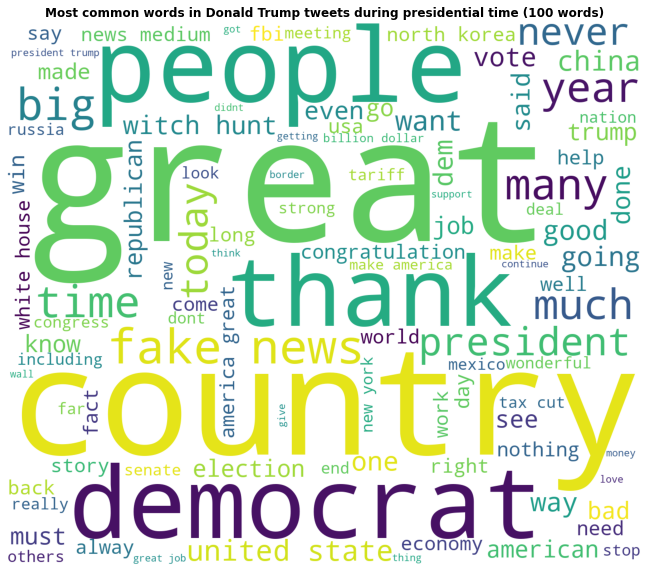

In [37]:
plt.subplots(figsize=(16,10))
duringwordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(during_joined)
plt.imshow(duringwordcloud)
plt.title('Most common words in Donald Trump tweets during presidential time (100 words)', fontweight="bold")
plt.axis('off')
plt.show()

## Comparing prepresidential and presidential time most used words in tweets

In [38]:
#convert lists to dictionaries
pre_dictionary = {}
for i in range(len(pre_mostcommon)):
    for n in pre_mostcommon[i]:
        pre_dictionary[pre_mostcommon[i][0]] = pre_mostcommon[i][1]
        
during_dictionary = {}
for i in range(len(during_mostcommon)):
    for n in during_mostcommon[i]:
        during_dictionary[during_mostcommon[i][0]] = during_mostcommon[i][1]

In [39]:
#finding words that appear on both lists of top 50 words
words_in_both_lists=[]

for i in pre_dictionary:
    if i in during_dictionary:
        words_in_both_lists.append(i)
print(len(words_in_both_lists))

27


It means that out of 50 most common words in prepresidential and presidential tweets 27 are the same words.

In [40]:
#list of words that appear on both top 50 most common words lists with number of appearences
# shape: (word, number of appearences in prepresidential list, number of appearences in presidential list)
both_lists = []
for i in words_in_both_lists:
    both_lists.append(i)
    both_lists.append(pre_dictionary[i])
    both_lists.append(during_dictionary[i])

In [41]:
to_dataframe = {'word' : [],
             'appearance in prepresidential tweets' : [],
             'appearance in presidential tweets' : []}

i = 0
while i <= len(both_lists)-2:
    to_dataframe['word'].append(both_lists[i])
    to_dataframe['appearance in prepresidential tweets'].append(both_lists[i+1])
    to_dataframe['appearance in presidential tweets'].append(both_lists[i+2])
    i+=3

In [42]:
dataframeiks = pd.DataFrame(to_dataframe,columns=['word',  'appearance in prepresidential tweets',  'appearance in presidential tweets'])
dataframeiks.drop(labels=range(5, 7), axis=0) #removing "wa", "u" and "ha" rowS, because those are stopswords
dataframeiks

,word,appearance in prepresidential tweets,appearance in presidential tweets
0,trump,5252,698
1,great,3784,2229
2,thank,1876,697
3,president,1809,956
4,get,1354,641
5,people,1332,1135
6,would,1275,611
7,america,1203,543
8,make,1193,451
9,new,1192,598


In [221]:
# Osakaalud

to_dataframe2 = {'word' : [],
             'appearance in prepresidential tweets' : [],
             'appearance in presidential tweets' : []}

i = 0
while i <= len(both_lists)-2:
    to_dataframe2['word'].append(both_lists[i])
    to_dataframe2['appearance in prepresidential tweets'].append(both_lists[i+1]/len(presumlist))
    to_dataframe2['appearance in presidential tweets'].append(both_lists[i+2]/len(duringsumlist))
    i+=3
    
dataframeiks2 = pd.DataFrame(to_dataframe2,columns=['word',  'appearance in prepresidential tweets',  'appearance in presidential tweets'])
dataframeiks2.drop(labels=range(5, 7), axis=0) #removing "wa", "u" and "ha" rowS, because those are stopswords
dataframeiks2

,word,appearance in prepresidential tweets,appearance in presidential tweets
0,trump,0.018938,0.004684
1,great,0.013644,0.014959
2,thank,0.006764,0.004678
3,president,0.006523,0.006416
4,get,0.004882,0.004302
5,people,0.004803,0.007617
6,would,0.004597,0.004101
7,america,0.004338,0.003644
8,make,0.004302,0.003027
9,new,0.004298,0.004013


The use of word "trump" decreased significally after becoming a president, the usage of "great" increased and the usage of "thank" decreased.

In [ ]:
retweet0 = 0
favorites0 = 0

for i in range(len(readydata)):
    if readydata.at[i, 'retweets'] == 0:
        retweet0 += 1
    if readydata.at[i, 'favorites'] == 0:
        favorites0 +=1

379 posts got no retweets and 716 posts got no favorites.

# Topic modelling

In [43]:
# Making matrix
from sklearn.feature_extraction.text import CountVectorizer

#Defining function
def word_tokenize(tekst):
    return word_tokenize(tekst)

vectorizer = CountVectorizer()

matrix = vectorizer.fit_transform(tweets_to_vec)

In [44]:
matrix.shape

(39975, 43333)

In [45]:
from gensim.models.ldamulticore import LdaModel
from gensim.matutils import Sparse2Corpus

In [46]:
corpus = Sparse2Corpus(matrix, documents_columns = False)

In [47]:
vocab = np.array(vectorizer.get_feature_names())

id2word = {}
for idx, i in enumerate(vocab):
    id2word[idx] = i

In [48]:
lda = LdaModel(corpus, num_topics=100, id2word=id2word) #100 topics using LDA model

In [49]:
for el in lda.show_topics(0,100):
    print(el)
    print('')

(27, '0.173*"number" + 0.157*"north" + 0.131*"left" + 0.128*"another" + 0.102*"justice" + 0.063*"taking" + 0.054*"secretary" + 0.019*"beyond" + 0.015*"coast" + 0.013*"jail" + 0.010*"recovery" + 0.010*"trust" + 0.009*"killer" + 0.007*"walking" + 0.005*"rolling" + 0.005*"scotland" + 0.004*"sand" + 0.003*"outrageous" + 0.003*"sea" + 0.002*"walked" + 0.001*"sex" + 0.001*"job" + 0.001*"proposed" + 0.000*"dune" + 0.000*"year" + 0.000*"america" + 0.000*"military" + 0.000*"record" + 0.000*"force" + 0.000*"american" + 0.000*"course" + 0.000*"cut" + 0.000*"cont" + 0.000*"million" + 0.000*"offender" + 0.000*"national" + 0.000*"fantastic" + 0.000*"duringbarackobamas" + 0.000*"tell" + 0.000*"simple" + 0.000*"reducing" + 0.000*"oil" + 0.000*"dont" + 0.000*"debt" + 0.000*"defense" + 0.000*"deal" + 0.000*"go" + 0.000*"bluffswe" + 0.000*"erode" + 0.000*"httptlgdfiul" + 0.000*"httptlgdherbc" + 0.000*"httptlgdgeoo" + 0.000*"advanage" + 0.000*"spectacularthe" + 0.000*"blagojevich" + 0.000*"podesta" + 0.00

In [50]:
assignments = lda.inference(corpus)

In [51]:
# argmax – finding the index of the element with the highest value; and axis = 1 – specifying that we are looking by rows
most_likely_labels = assignments[0].argmax(axis=1)

In [52]:
# Fixing indexes
tweets.reset_index(inplace=True)
tweets = tweets.drop(columns = ['index'])

In [53]:
# Topics into tweets dataset

tweets['categories'] = '' #New column for topics
tweets['categories'] = tweets['categories'].astype('object')

for i in range(len(tweets)):
    tweets.at[i, 'categories'] = most_likely_labels[i]

In [54]:
tweets

,content,date,retweets,favorites,lemmas,categories
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,"[sure, tune, watch, donald, trump, late, night...",15
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,"[donald, trump, appearing, view, tomorrow, mor...",59
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,"[donald, trump, read, top, ten, financial, tip...",71
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,"[new, blog, post, celebrity, apprentice, final...",89
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,"[persona, never, wallflower, id, rather, build...",24
...,...,...,...,...,...,...
39970,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,"[never, seen, republican, party, strong, unifi...",87
39971,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,"[mini, mike, bloomberg, critical, jack, wilson...",90
39972,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,"[wa, thrilled, back, great, state, texas, toni...",84
39973,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,"[house, president, got, le, due, process, terr...",43


In [ ]:
lda_50 = LdaModel(corpus, num_topics=50, id2word=id2word) #50 topics
lda_20 = LdaModel(corpus, num_topics=20, id2word=id2word) #20 topics

assignments_50 = lda_50.inference(corpus)
assignments_20 = lda_20.inference(corpus)

most_likely_labels_50 = assignments_50[0].argmax(axis=1)
most_likely_labels_20 = assignments_20[0].argmax(axis=1)

tweets['categories_50'] = '' #New column for topics
tweets['categories_50'] = tweets['categories_50'].astype('object')

for i in range(len(tweets)):
    tweets.at[i, 'categories_50'] = most_likely_labels_50[i]
    
tweets['categories_20'] = '' #New column for topics
tweets['categories_20'] = tweets['categories_20'].astype('object')

for i in range(len(tweets)):
    tweets.at[i, 'categories_20'] = most_likely_labels_20[i]

# Sentiment analysis

In [55]:
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

2021-12-13 21:22:16,042 loading file /Users/susannamett/.flair/models/sentiment-en-mix-distillbert_4.pt


In [56]:
# Extra column for lemmatized text

tweets['lemmatized'] = ''
tweets['lemmatized'] = tweets['lemmatized'].astype('object')

for i in range(len(tweets)):
    tweets.at[i, 'lemmatized'] = tweets_to_vec[i]

In [ ]:
# Sentiment analysis using Flair
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"

tweets["sentiment"] = tweets["lemmatized"].apply(flair_prediction)

In [ ]:
# Writing results into new csv file

tweets.to_csv('tweets1.csv')

# Building the model for predicting tweets popularity

## Preparing data

In [58]:
# importing modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from numpy import ravel

In [200]:
with open('tweets2.csv', 'r') as f:
    readydata = pd.read_csv(f)

In [201]:
# only using presidential time tweets for modelling
readyydata = readydata.copy()
split_date ='2017-01-20 00:00:00'
presidential_data = readyydata.loc[readyydata['date'] >= split_date]

In [61]:
# seeing if likes and retweets correlate
presidential_data['favorites'].corr(presidential_data['retweets'])

0.9211333888834459

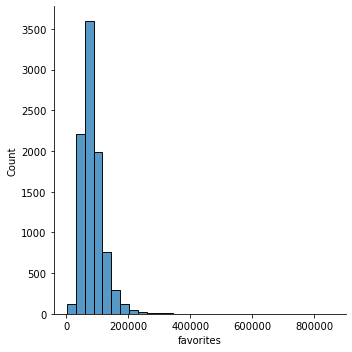

In [62]:
sns.displot(presidential_data, x="favorites", bins=30)

In [63]:
presidential_data['favorites'].max()

857678

In [64]:
presidential_data['favorites'].min()

2378

In [65]:
presidential_data['favorites'].describe()

count      9204.000000
mean      83871.610930
std       41314.492191
min        2378.000000
25%       59228.750000
50%       76391.500000
75%       99116.750000
max      857678.000000
Name: favorites, dtype: float64

## using 100 topic categories

In [66]:
readydata

,Unnamed: 0,level_0,content,date,retweets,favorites,lemmas,categories,lemmatized,sentiment,categories_50,categories_20
0,0,0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,"['sure', 'tune', 'watch', 'donald', 'trump', '...",32,sure tune watch donald trump late night david ...,pos,5,17
1,1,1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,"['donald', 'trump', 'appearing', 'view', 'tomo...",21,donald trump appearing view tomorrow morning d...,neg,14,6
2,2,2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,"['donald', 'trump', 'read', 'top', 'ten', 'fin...",32,donald trump read top ten financial tip late s...,pos,5,2
3,3,3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,"['new', 'blog', 'post', 'celebrity', 'apprenti...",21,new blog post celebrity apprentice finale less...,neg,13,9
4,4,4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,"['persona', 'never', 'wallflower', 'id', 'rath...",2,persona never wallflower id rather build wall ...,neg,29,19
...,...,...,...,...,...,...,...,...,...,...,...,...
39970,39970,39970,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,"['never', 'seen', 'republican', 'party', 'stro...",19,never seen republican party strong unified rig...,neg,30,0
39971,39971,39971,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,"['mini', 'mike', 'bloomberg', 'critical', 'jac...",97,mini mike bloomberg critical jack wilson saved...,neg,23,5
39972,39972,39972,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,"['wa', 'thrilled', 'back', 'great', 'state', '...",10,wa thrilled back great state texas tonight peo...,pos,40,3
39973,39973,39973,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,"['house', 'president', 'got', 'le', 'due', 'pr...",45,house president got le due process terrorist g...,neg,29,0


Favorites range from 2378 to 857678.

In [67]:
# putting favorites in categories and adding numerical value to it

# very popular(> 200 000 favorites) - 4
# popular (135 000 - 200 000 favorites) - 3
# slightly popular (70 000 - 135 000 favorites) - 2
# unpopular (< 70 000 favorites) - 1

presidential_data['favorites_categories'] = pd.cut(presidential_data['favorites'], bins=[0, 70000, 135000, 200000, 857679], labels=[1, 2, 3, 4])

/opt/miniconda3/envs/minu_keskkond/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
# removing unneccesary columns
presidentials_data = presidential_data.drop(["Unnamed: 0", "level_0","content",'date','retweets','favorites','lemmas','lemmatized', 'categories_50', 'categories_20'], axis=1)
presidentials_data

,categories,sentiment,favorites_categories
30771,11,pos,3
30772,18,pos,2
30773,67,pos,4
30774,95,neg,2
30775,83,pos,2
...,...,...,...
39970,19,neg,4
39971,97,neg,3
39972,10,pos,1
39973,45,neg,2


In [69]:
# getting dummies of sentiment column and of topic column
data_dummies = pd.get_dummies(presidentials_data, columns=['sentiment', 'categories'])
data_dummies

,favorites_categories,sentiment_neg,sentiment_pos,categories_0,categories_1,categories_2,categories_3,categories_4,categories_5,categories_6,...,categories_90,categories_91,categories_92,categories_93,categories_94,categories_95,categories_96,categories_97,categories_98,categories_99
30771,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30772,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30773,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30774,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30775,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39970,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39971,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39972,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39973,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# making training and testing datasets (80%, 20%)
train, test = train_test_split(data_dummies, test_size=0.2, shuffle=True)

In [71]:
# balancing the training dataset
train['favorites_categories'].value_counts()

2    3782
1    2972
3     512
4      97
Name: favorites_categories, dtype: int64

In [72]:
# making 1500 samples from every value in 'favorites_categories'
unpopular = train[train['favorites_categories'] == 1].sample(n=1500, random_state=0)
slightlypopular = train[train['favorites_categories'] == 2].sample(n=1500, random_state=0)
popular = train[train['favorites_categories'] == 3].sample(n=1500, random_state=0, replace=True)
verypopular = train[train['favorites_categories'] == 4].sample(n=1500, random_state=0, replace=True)
train_balanced = pd.concat([unpopular,slightlypopular, popular, verypopular])
train_balanced

,favorites_categories,sentiment_neg,sentiment_pos,categories_0,categories_1,categories_2,categories_3,categories_4,categories_5,categories_6,...,categories_90,categories_91,categories_92,categories_93,categories_94,categories_95,categories_96,categories_97,categories_98,categories_99
33639,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32153,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38203,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36943,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34730,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39838,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35799,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36993,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39901,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
features_train = train_balanced.drop('favorites_categories', axis=1)
outcome_train = train_balanced['favorites_categories']
features_test = train_balanced.drop('favorites_categories', axis=1)
outcome_test = train_balanced['favorites_categories']

## Training model

In [74]:
rf_model_balanced = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(features_train, ravel(outcome_train))

## Testing model

In [75]:
outcome_pred = rf_model_balanced.predict(features_test)
confusion_matrix_result_balanced = confusion_matrix(outcome_test.values, outcome_pred, labels=[1, 2, 3, 4])
print("Confusion matrix:\n%s" % confusion_matrix_result_balanced)

Confusion matrix:
[[424 498 171 407]
 [209 744 225 322]
 [150 584 432 334]
 [ 72 391 226 811]]


<AxesSubplot:>

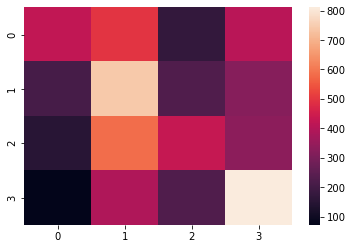

In [76]:
sns.heatmap(confusion_matrix_result_balanced)

<AxesSubplot:>

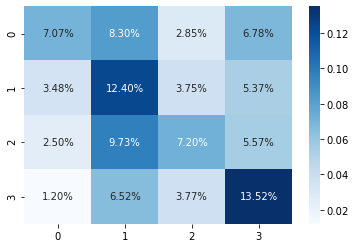

In [77]:
sns.heatmap(confusion_matrix_result_balanced/np.sum(confusion_matrix_result_balanced), annot=True, fmt='.2%', cmap='Blues')

The result categories are as follows
* 0 – unpopular;
* 1 – slightly popular;
* 2 – popular;
* 3 – very popular.

True positive values are 0 – 7.07%; 1 – 12.40%; 2 – 7.20%; 13.52%.
The percentages in the true positive cells are not very high, very popular tweets are the most accurately predicted (13.52%), after which follows the category of slightly popular (12.40%). Overall, the results lack accuracy since more tweets are predicted to be in the wrong than in the right category. However, the percentage of correctly predicted tweets is higher than other cells individually in all categories. It shows that the model could be more precise and that it might be that either 100 topics plus sentiment are not the best features to predict popularity with or that the models (topic modelling, sentiment analysis, random forest model) should be made more accurate.

## using 50 topic categories

In [78]:
readydata

,Unnamed: 0,level_0,content,date,retweets,favorites,lemmas,categories,lemmatized,sentiment,categories_50,categories_20
0,0,0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,"['sure', 'tune', 'watch', 'donald', 'trump', '...",32,sure tune watch donald trump late night david ...,pos,5,17
1,1,1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,"['donald', 'trump', 'appearing', 'view', 'tomo...",21,donald trump appearing view tomorrow morning d...,neg,14,6
2,2,2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,"['donald', 'trump', 'read', 'top', 'ten', 'fin...",32,donald trump read top ten financial tip late s...,pos,5,2
3,3,3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,"['new', 'blog', 'post', 'celebrity', 'apprenti...",21,new blog post celebrity apprentice finale less...,neg,13,9
4,4,4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,"['persona', 'never', 'wallflower', 'id', 'rath...",2,persona never wallflower id rather build wall ...,neg,29,19
...,...,...,...,...,...,...,...,...,...,...,...,...
39970,39970,39970,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,"['never', 'seen', 'republican', 'party', 'stro...",19,never seen republican party strong unified rig...,neg,30,0
39971,39971,39971,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,"['mini', 'mike', 'bloomberg', 'critical', 'jac...",97,mini mike bloomberg critical jack wilson saved...,neg,23,5
39972,39972,39972,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,"['wa', 'thrilled', 'back', 'great', 'state', '...",10,wa thrilled back great state texas tonight peo...,pos,40,3
39973,39973,39973,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,"['house', 'president', 'got', 'le', 'due', 'pr...",45,house president got le due process terrorist g...,neg,29,0


Favorites range from 2378 to 857678.

In [79]:
# putting favorites in categories and adding numerical value to it

# very popular(> 200 000 favorites) - 4
# popular (135 000 - 200 000 favorites) - 3
# slightly popular (70 000 - 135 000 favorites) - 2
# unpopular (< 70 000 favorites) - 1

presidential_data['favorites_categories'] = pd.cut(presidential_data['favorites'], bins=[0, 70000, 135000, 200000, 857679], labels=[1, 2, 3, 4])

/opt/miniconda3/envs/minu_keskkond/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
# remove unneccesary column(s)
presidentials_data = presidential_data.drop(["Unnamed: 0", "level_0","content",'date','retweets','favorites','lemmas','categories', 'lemmatized', 'categories_20'], axis=1)
presidentials_data

,sentiment,categories_50,favorites_categories
30771,pos,40,3
30772,pos,48,2
30773,pos,36,4
30774,neg,3,2
30775,pos,35,2
...,...,...,...
39970,neg,30,4
39971,neg,23,3
39972,pos,40,1
39973,neg,29,2


In [81]:
# getting dummies of sentiment column
data_dummies = pd.get_dummies(presidentials_data, columns=['sentiment', 'categories_50'])
data_dummies

,favorites_categories,sentiment_neg,sentiment_pos,categories_50_0,categories_50_1,categories_50_2,categories_50_3,categories_50_4,categories_50_5,categories_50_6,...,categories_50_40,categories_50_41,categories_50_42,categories_50_43,categories_50_44,categories_50_45,categories_50_46,categories_50_47,categories_50_48,categories_50_49
30771,3,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30772,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30773,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30774,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30775,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39970,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39971,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39972,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39973,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# making training and testing datasets (80%, 20%)
train, test = train_test_split(data_dummies, test_size=0.2, shuffle=True)

In [83]:
# balancing the training dataset
train['favorites_categories'].value_counts()

2    3808
1    2992
3     468
4      95
Name: favorites_categories, dtype: int64

In [84]:
# making 1500 samples from every value in 'favorites_categories'
unpopular = train[train['favorites_categories'] == 1].sample(n=1500, random_state=0)
slightlypopular = train[train['favorites_categories'] == 2].sample(n=1500, random_state=0)
popular = train[train['favorites_categories'] == 3].sample(n=1500, random_state=0, replace=True)
verypopular = train[train['favorites_categories'] == 4].sample(n=1500, random_state=0, replace=True)
train_balanced = pd.concat([unpopular,slightlypopular, popular, verypopular])
train_balanced

,favorites_categories,sentiment_neg,sentiment_pos,categories_50_0,categories_50_1,categories_50_2,categories_50_3,categories_50_4,categories_50_5,categories_50_6,...,categories_50_40,categories_50_41,categories_50_42,categories_50_43,categories_50_44,categories_50_45,categories_50_46,categories_50_47,categories_50_48,categories_50_49
31679,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39422,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32189,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38992,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39129,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39756,4,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
36993,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35740,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35286,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
features_train = train_balanced.drop('favorites_categories', axis=1)
outcome_train = train_balanced['favorites_categories']
features_test = train_balanced.drop('favorites_categories', axis=1)
outcome_test = train_balanced['favorites_categories']

## Training model

In [86]:
rf_model_balanced = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(features_train, ravel(outcome_train))

## Testing model

In [87]:
outcome_pred = rf_model_balanced.predict(features_test)
confusion_matrix_result_balanced = confusion_matrix(outcome_test.values, outcome_pred, labels=[1, 2, 3, 4])
print("Confusion matrix:\n%s" % confusion_matrix_result_balanced)

Confusion matrix:
[[739 191 421 149]
 [491 313 584 112]
 [361 181 758 200]
 [320  91 469 620]]


<AxesSubplot:>

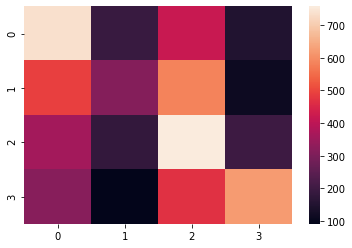

In [88]:
sns.heatmap(confusion_matrix_result_balanced)

<AxesSubplot:>

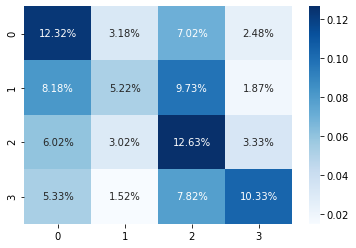

In [89]:
sns.heatmap(confusion_matrix_result_balanced/np.sum(confusion_matrix_result_balanced), annot=True, fmt='.2%', cmap='Blues')

The result categories are as follows
* 0 – unpopular;
* 1 – slightly popular;
* 2 – popular;
* 3 – very popular.

True positive values are 0 – 12.32%; 1 – 5.22%; 2 – 12.63%; 10.33%.
Once again, the percentages in the true positive cells are not very high but the percentages are slightly higher, excluding the category of slightly popular tweets. It seems that the number of 50 topics give more accurate results than 100 topics.

## using 20 categories

In [90]:
readydata

,Unnamed: 0,level_0,content,date,retweets,favorites,lemmas,categories,lemmatized,sentiment,categories_50,categories_20
0,0,0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,"['sure', 'tune', 'watch', 'donald', 'trump', '...",32,sure tune watch donald trump late night david ...,pos,5,17
1,1,1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,"['donald', 'trump', 'appearing', 'view', 'tomo...",21,donald trump appearing view tomorrow morning d...,neg,14,6
2,2,2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,"['donald', 'trump', 'read', 'top', 'ten', 'fin...",32,donald trump read top ten financial tip late s...,pos,5,2
3,3,3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,"['new', 'blog', 'post', 'celebrity', 'apprenti...",21,new blog post celebrity apprentice finale less...,neg,13,9
4,4,4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,"['persona', 'never', 'wallflower', 'id', 'rath...",2,persona never wallflower id rather build wall ...,neg,29,19
...,...,...,...,...,...,...,...,...,...,...,...,...
39970,39970,39970,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,"['never', 'seen', 'republican', 'party', 'stro...",19,never seen republican party strong unified rig...,neg,30,0
39971,39971,39971,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,"['mini', 'mike', 'bloomberg', 'critical', 'jac...",97,mini mike bloomberg critical jack wilson saved...,neg,23,5
39972,39972,39972,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,"['wa', 'thrilled', 'back', 'great', 'state', '...",10,wa thrilled back great state texas tonight peo...,pos,40,3
39973,39973,39973,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,"['house', 'president', 'got', 'le', 'due', 'pr...",45,house president got le due process terrorist g...,neg,29,0


Favorites range from 2378 to 857678.

In [91]:
# putting favorites in categories and adding numerical value to it

# very popular(> 200 000 favorites) - 4
# popular (135 000 - 200 000 favorites) - 3
# slightly popular (70 000 - 135 000 favorites) - 2
# unpopular (< 70 000 favorites) - 1

presidential_data['favorites_categories'] = pd.cut(presidential_data['favorites'], bins=[0, 70000, 135000, 200000, 857679], labels=[1, 2, 3, 4])

/opt/miniconda3/envs/minu_keskkond/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
# remove unneccesary column(s)
presidentials_data = presidential_data.drop(["Unnamed: 0", "level_0","content",'date','retweets','favorites','lemmas','categories', 'lemmatized', 'categories_50'], axis=1)
presidentials_data

,sentiment,categories_20,favorites_categories
30771,pos,3,3
30772,pos,0,2
30773,pos,17,4
30774,neg,4,2
30775,pos,0,2
...,...,...,...
39970,neg,0,4
39971,neg,5,3
39972,pos,3,1
39973,neg,0,2


In [93]:
# getting dummies of sentiment column
data_dummies = pd.get_dummies(presidentials_data, columns=['sentiment', 'categories_20'])
data_dummies

,favorites_categories,sentiment_neg,sentiment_pos,categories_20_0,categories_20_1,categories_20_2,categories_20_3,categories_20_4,categories_20_5,categories_20_6,...,categories_20_10,categories_20_11,categories_20_12,categories_20_13,categories_20_14,categories_20_15,categories_20_16,categories_20_17,categories_20_18,categories_20_19
30771,3,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30772,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30773,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30774,2,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30775,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39970,4,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39971,3,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39972,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39973,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# making training and testing datasets (80%, 20%)
train, test = train_test_split(data_dummies, test_size=0.2, shuffle=True)

In [95]:
# balancing the training dataset
train['favorites_categories'].value_counts()

2    3796
1    2983
3     490
4      94
Name: favorites_categories, dtype: int64

In [96]:
# making 1500 samples from every value in 'favorites_categories'
unpopular = train[train['favorites_categories'] == 1].sample(n=1500, random_state=0)
slightlypopular = train[train['favorites_categories'] == 2].sample(n=1500, random_state=0)
popular = train[train['favorites_categories'] == 3].sample(n=1500, random_state=0, replace=True)
verypopular = train[train['favorites_categories'] == 4].sample(n=1500, random_state=0, replace=True)
train_balanced = pd.concat([unpopular,slightlypopular, popular, verypopular])
train_balanced

,favorites_categories,sentiment_neg,sentiment_pos,categories_20_0,categories_20_1,categories_20_2,categories_20_3,categories_20_4,categories_20_5,categories_20_6,...,categories_20_10,categories_20_11,categories_20_12,categories_20_13,categories_20_14,categories_20_15,categories_20_16,categories_20_17,categories_20_18,categories_20_19
38222,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39825,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
35126,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39067,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30801,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35286,4,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37551,4,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
32204,4,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30873,4,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [97]:
features_train = train_balanced.drop('favorites_categories', axis=1)
outcome_train = train_balanced['favorites_categories']
features_test = train_balanced.drop('favorites_categories', axis=1)
outcome_test = train_balanced['favorites_categories']

## Training model

In [98]:
rf_model_balanced = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(features_train, ravel(outcome_train))

## Testing model

In [99]:
outcome_pred = rf_model_balanced.predict(features_test)
confusion_matrix_result_balanced = confusion_matrix(outcome_test.values, outcome_pred, labels=[1, 2, 3, 4])
print("Confusion matrix:\n%s" % confusion_matrix_result_balanced)

Confusion matrix:
[[ 261  502  104  633]
 [ 120  695  142  543]
 [ 138  577  207  578]
 [  32  315  135 1018]]


<AxesSubplot:>

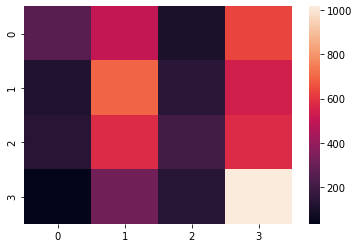

In [100]:
sns.heatmap(confusion_matrix_result_balanced)

<AxesSubplot:>

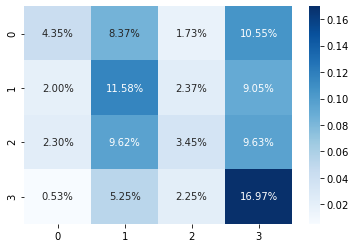

In [101]:
sns.heatmap(confusion_matrix_result_balanced/np.sum(confusion_matrix_result_balanced), annot=True, fmt='.2%', cmap='Blues')

The result categories are as follows
* 0 – unpopular;
* 1 – slightly popular;
* 2 – popular;
* 3 – very popular.

True positive values are 0 – 4.35%; 1 – 11.58%; 2 – 3.45%; 16.97%.
This model is the most inaccurate which shows that with the amount of over 40,000 tweets it is not reasonable to divide them to only 20 categories since the content is inaccurately put together and based on that it is difficult to predict the popularity of tweets. However, the category of true positive of very popular tweets is the highest of all models which shows that 20 topic categories correctly distinguishes some popular topics. 

## 75 categories

In [147]:
with open('tweets1_2.csv', 'r') as f:
    readydata2 = pd.read_csv(f)

In [148]:
readydata2['sentiment'] = '' #Uus veerg kategooriatele (topic modelling)
readydata2['sentiment'] = readydata2['sentiment'].astype('object')

for i in range(len(tweets)):
    readydata2.at[i, 'sentiment'] = readydata.at[i, 'sentiment']

In [149]:
#only using presidential time tweets for modelling
readyydata2 = readydata2.copy()
split_date ='2017-01-20 00:00:00'
presidential_data2 = readyydata2.loc[readyydata2['date'] >= split_date]

In [150]:
# putting favorites in categories and adding numerical value to it

# very popular(> 200 000 favorites) - 4
# popular (135 000 - 200 000 favorites) - 3
# slightly popular (70 000 - 135 000 favorites) - 2
# unpopular (< 70 000 favorites) - 1

presidential_data2['favorites_categories'] = pd.cut(presidential_data2['favorites'], bins=[0, 70000, 135000, 200000, 857679], labels=[1, 2, 3, 4])

# remove unneccesary column(s)
presidentials_data2 = presidential_data2.drop(["Unnamed: 0","content",'date','retweets','favorites','lemmas','categories', 'categories_20', 'categories_50'], axis=1)
presidentials_data2


/opt/miniconda3/envs/minu_keskkond/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,categories_75,sentiment,favorites_categories
30771,52,pos,3
30772,52,pos,2
30773,68,pos,4
30774,51,neg,2
30775,52,pos,2
...,...,...,...
39970,15,neg,4
39971,54,neg,3
39972,27,pos,1
39973,35,neg,2


In [151]:
data_dummies2 = pd.get_dummies(presidentials_data2, columns=['sentiment', 'categories_75'])
data_dummies2

,favorites_categories,sentiment_neg,sentiment_pos,categories_75_0,categories_75_1,categories_75_2,categories_75_3,categories_75_4,categories_75_5,categories_75_6,...,categories_75_65,categories_75_66,categories_75_67,categories_75_68,categories_75_69,categories_75_70,categories_75_71,categories_75_72,categories_75_73,categories_75_74
30771,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30772,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30773,4,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
30774,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30775,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39970,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39971,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39972,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39973,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# making training and testing datasets (80%, 20%)
train, test = train_test_split(data_dummies, test_size=0.2, shuffle=True)

In [153]:
# balancing the training dataset
train['favorites_categories'].value_counts()

2    3767
1    3020
3     475
4     101
Name: favorites_categories, dtype: int64

In [154]:
# making 1500 samples from every value in 'favorites_categories'
unpopular = train[train['favorites_categories'] == 1].sample(n=1500, random_state=0)
slightlypopular = train[train['favorites_categories'] == 2].sample(n=1500, random_state=0)
popular = train[train['favorites_categories'] == 3].sample(n=1500, random_state=0, replace=True)
verypopular = train[train['favorites_categories'] == 4].sample(n=1500, random_state=0, replace=True)
train_balanced = pd.concat([unpopular,slightlypopular, popular, verypopular])
train_balanced

,favorites_categories,sentiment_neg,sentiment_pos,categories_20_0,categories_20_1,categories_20_2,categories_20_3,categories_20_4,categories_20_5,categories_20_6,...,categories_20_10,categories_20_11,categories_20_12,categories_20_13,categories_20_14,categories_20_15,categories_20_16,categories_20_17,categories_20_18,categories_20_19
33979,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34176,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34817,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
38269,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38740,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30864,4,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37551,4,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
33605,4,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
34593,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [155]:
features_train = train_balanced.drop('favorites_categories', axis=1)
outcome_train = train_balanced['favorites_categories']
features_test = train_balanced.drop('favorites_categories', axis=1)
outcome_test = train_balanced['favorites_categories']

In [156]:
rf_model_balanced = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(features_train, ravel(outcome_train))

In [157]:
outcome_pred = rf_model_balanced.predict(features_test)
confusion_matrix_result_balanced = confusion_matrix(outcome_test.values, outcome_pred, labels=[1, 2, 3, 4])
print("Confusion matrix:\n%s" % confusion_matrix_result_balanced)

Confusion matrix:
[[287 464 134 615]
 [169 652 189 490]
 [108 561 268 563]
 [ 32 434 102 932]]


<AxesSubplot:>

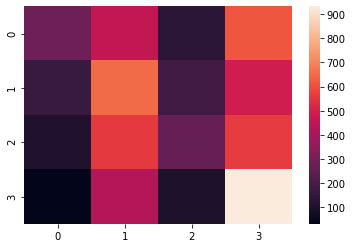

In [158]:
sns.heatmap(confusion_matrix_result_balanced)

<AxesSubplot:>

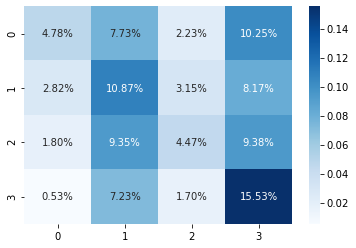

In [159]:
sns.heatmap(confusion_matrix_result_balanced/np.sum(confusion_matrix_result_balanced), annot=True, fmt='.2%', cmap='Blues')

The result categories are as follows
* 0 – unpopular;
* 1 – slightly popular;
* 2 – popular;
* 3 – very popular.

True positive values are 0 – 4.78%; 1 – 10.87%; 2 – 4.47%; 15.53%.
We experimented with 75 topic categories after seeing that 100 and 50 topic models gave the best results, hoping to receive better results. However, the model proved to be quite inaccurate, although the percentage of true positive very popular predictions is higher than in 50 and 100 topic models. The cells of true positive cells also still contain a larger percentage than false positive cells.

# Pre-presidential time model

In [161]:
readydata

,Unnamed: 0,level_0,content,date,retweets,favorites,lemmas,categories,lemmatized,sentiment,categories_50,categories_20
0,0,0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,"['sure', 'tune', 'watch', 'donald', 'trump', '...",32,sure tune watch donald trump late night david ...,pos,5,17
1,1,1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,"['donald', 'trump', 'appearing', 'view', 'tomo...",21,donald trump appearing view tomorrow morning d...,neg,14,6
2,2,2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,"['donald', 'trump', 'read', 'top', 'ten', 'fin...",32,donald trump read top ten financial tip late s...,pos,5,2
3,3,3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,"['new', 'blog', 'post', 'celebrity', 'apprenti...",21,new blog post celebrity apprentice finale less...,neg,13,9
4,4,4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,"['persona', 'never', 'wallflower', 'id', 'rath...",2,persona never wallflower id rather build wall ...,neg,29,19
...,...,...,...,...,...,...,...,...,...,...,...,...
39970,39970,39970,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,"['never', 'seen', 'republican', 'party', 'stro...",19,never seen republican party strong unified rig...,neg,30,0
39971,39971,39971,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,"['mini', 'mike', 'bloomberg', 'critical', 'jac...",97,mini mike bloomberg critical jack wilson saved...,neg,23,5
39972,39972,39972,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,"['wa', 'thrilled', 'back', 'great', 'state', '...",10,wa thrilled back great state texas tonight peo...,pos,40,3
39973,39973,39973,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,"['house', 'president', 'got', 'le', 'due', 'pr...",45,house president got le due process terrorist g...,neg,29,0


In [162]:
#only using pre-presidential time tweets for modelling
readyydata_pre = readydata.copy()
split_date ='2017-01-20 00:00:00'
presidential_data_pre = readyydata_pre.loc[readyydata_pre['date'] < split_date]

In [163]:
# seeing if likes and retweets correlate
presidential_data_pre['favorites'].corr(presidential_data_pre['retweets'])

0.87038924785694

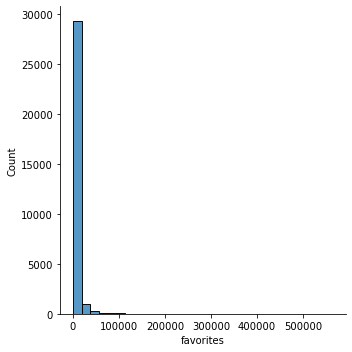

In [164]:
sns.displot(presidential_data_pre, x="favorites", bins=30)

In [169]:
print(presidential_data_pre['favorites'].max())
print(presidential_data_pre['favorites'].min())

564352
0


In [171]:
len(presidential_data_pre)

30771

In [173]:
presidential_data_pre['favorites'].describe()

count     30771.000000
mean       3178.957720
std       11731.327506
min           0.000000
25%          20.000000
50%          60.000000
75%         846.500000
max      564352.000000
Name: favorites, dtype: float64

In [225]:
presidential_data_pre.describe(include=object)

,content,date,lemmas,lemmatized,sentiment
count,30771,30771,30771,30771,30771
unique,30628,30770,30322,30322,2
top,MAKE AMERICA GREAT AGAIN!,2016-01-14 06:45:41,"['make', 'america', 'great']",make america great,pos
freq,11,2,21,21,16310


Before presidency, the popularity of Trump's tweets was overall not very high compared to the time of presidency, the 50% quantile being only 60 favorites. There are some tweets, however, that are a lot more popular.

# A year before presidency – election time

More popular tweets of pre-presidency are likely from the election time which is why this time period deserves exploration. For that time period we used one year before presidency.

In [180]:
#only using election time tweets for modelling
readyydata_election = readydata.copy()
split_date1 = '2016-01-20 00:00:00'
split_date2 ='2017-01-20 00:00:00'
presidential_data_election = readyydata_election.loc[readyydata_election['date'] <= split_date2]
presidential_data_election = presidential_data_election.loc[presidential_data_election['date'] >= split_date1]

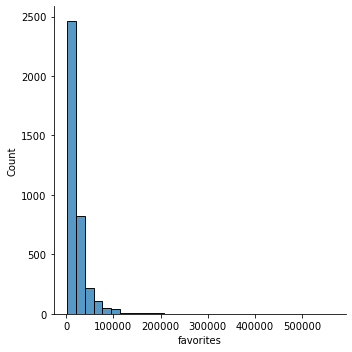

In [182]:
sns.displot(presidential_data_election, x="favorites", bins=30)

In [183]:
print(presidential_data_election['favorites'].max())
print(presidential_data_election['favorites'].min())

564352
1613


In [184]:
presidential_data_election['favorites'].describe()

count      3735.000000
mean      21787.468809
std       25705.534308
min        1613.000000
25%        8949.000000
50%       14808.000000
75%       24573.000000
max      564352.000000
Name: favorites, dtype: float64

In [185]:
presidential_data_election['retweets'].describe()

count      3735.000000
mean       7201.309772
std        9118.060516
min         495.000000
25%        2960.000000
50%        5147.000000
75%        8812.000000
max      295817.000000
Name: retweets, dtype: float64

# Sentiment

Text(0.5, 1.0, 'Distribution of positive and negative sentiment of the tweets of Donald Trump')

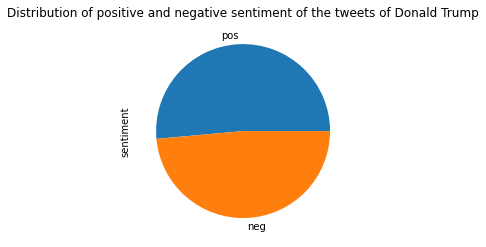

In [199]:
sektord = readydata.sentiment.value_counts().plot(kind='pie')

sektord.set_title("Distribution of positive and negative sentiment of the tweets of Donald Trump")

Overall, there are slightly more tweets which are positive than of which are negative.

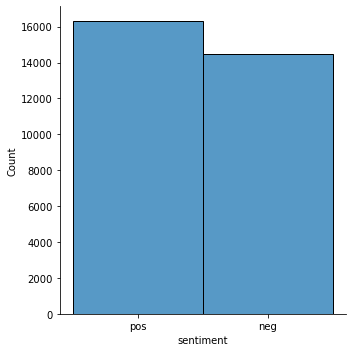

In [186]:
#Pre-election
sns.displot(presidential_data_pre, x="sentiment", bins=30)

Before presidential time there were more positive than negative tweets.

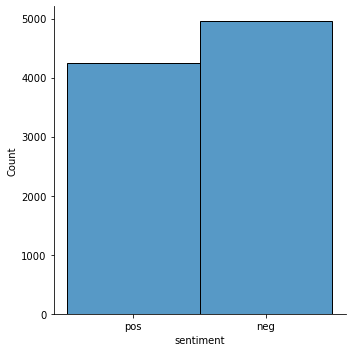

In [202]:
#Post-election
sns.displot(presidential_data, x="sentiment", bins=30)

After elections there were more negative than positive tweets.

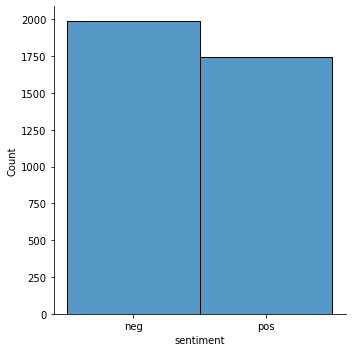

In [190]:
#Election

sns.displot(presidential_data_election, x="sentiment", bins=30)

In a year before becoming a president there were more negative tweets than positive tweets.